In [76]:
from data_initialization_spikeSorting import *
from preprocess_data import *

In [134]:
num_cell=2
num_electron=2
time =10001
delay=False
noise_level=5
spike_len=200
boolean=np.ones((num_cell,num_electron))

spike_shape_parameter=multi_electrons_shape_generator(num_cell,num_electron)
overlap_level=200
    
signal_r,timeline_list,signal_matrix,delay_matrix,num_spike=multi_electrons_signal_generator(num_cell,
num_electron,spike_shape_parameter,time,delay,overlap_level,noise_level,boolean,spike_len)

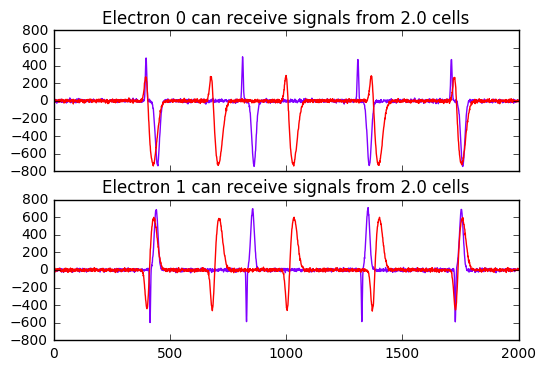

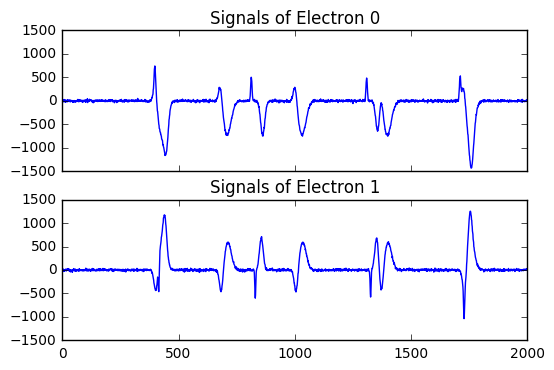

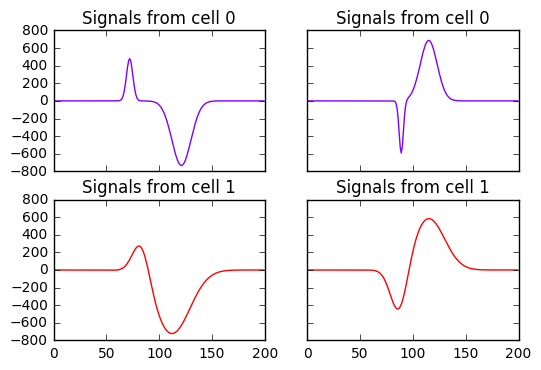

In [135]:
plot_size=5000


plot_data(num_cell,num_electron,signal_matrix,signal_r,spike_shape_parameter,boolean,spike_len,plot_size=2000)






/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/signal/_arraytools.py:45: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  b = a[a_slice]


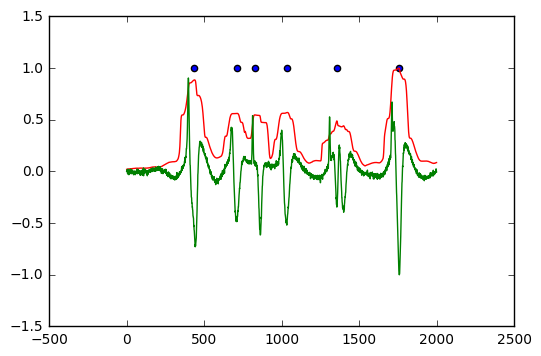

[ 437  711  826 1036 1356 1756]


In [154]:
data=preprocess_data(signal_r[0])
windowed_data_sq = np.convolve(data ** 2, np.ones(h + 1), "same")
windowed_data_aux = np.sqrt(windowed_data_sq)
windowed_data = windowed_data_aux / np.amax(np.abs(windowed_data_aux))

windowed_data=windowed_data[0:2000]
threshold=np.mean(windowed_data)
spike_loc=detect_peaks(windowed_data, mph=threshold, mpd=spike_len/2, show=False)

plt.plot(windowed_data[0:2000],'r')
plt.plot(data[0:2000],'g')
plt.scatter(spike_loc,np.ones(len(spike_loc)))

plt.show()


print(spike_loc)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


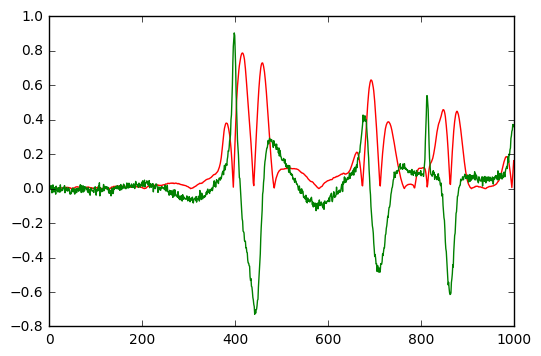

In [180]:

# new kernel for convolution enerty 
h=50
window_l = np.hstack((np.ones(h/2), -np.ones(h/2)))
window_r = np.hstack((-np.ones(h/2),np.ones(h/2)))
windowed_data_l = np.convolve(data , window_l,"same")
windowed_data_r = np.convolve(data  ,window_r,"same")
windowed_data2 = np.maximum(windowed_data_l,windowed_data_r)
#windowed_data2 =windowed_data_l
#windowed_data2 =windowed_data_r

windowed_data2 = windowed_data2/np.amax(np.abs(windowed_data2))


windowed_data2=windowed_data2[0:2000]
threshold=np.mean(windowed_data2)
spike_loc=detect_peaks(windowed_data2, mph=threshold, mpd=spike_len/2, show=False)

plt.plot(windowed_data2[0:1000],'r')
plt.plot(data[0:1000],'g')
#plt.scatter(spike_loc,np.ones(len(spike_loc)))
plt.show()


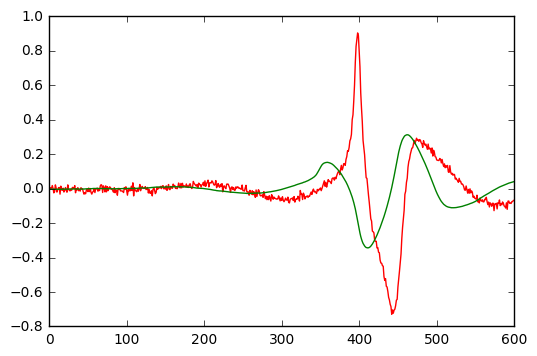

In [177]:
con=np.convolve(data[0:600],window_l,'same')
plt.plot(data[0:600],'r')
plt.plot(con[0:600]/100,'g')
plt.show()

In [159]:
# new kernel : for closed realted signal, better detect


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])